# Read `POST` nodes

Solution to being unable to get cell centroids - read the nodes directly!

In [3]:
import os
import h5py
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Define the data folder - must include .h5 cas and dat files.
data_folder = r"D:\2024 - Thermal Amplifiers - KC\Tr=1.1\Lauren\\"

#from cmcrameri import cm

In [10]:
# Check if NodeX is not defined
if 'NodeX' not in globals():
    # Find .cas.post files
    case_files = [f for f in os.listdir(data_folder) if f.endswith('.cas.post')]
    
    if case_files:
        fname = os.path.join(data_folder, case_files[0])
        
        # Read the mesh data from the HDF5 file
        with h5py.File(fname, 'r') as f:
            vertex_list = np.transpose(f['/meshes/1.post/nodes/coords/1'][:])
        
        # Extract NodeX and NodeY
        node_x = vertex_list[0]
        node_y = vertex_list[1]
    
    # Clean up variables
    del case_files

# Define constants
tw = 308
yw = -0.015

# Find *dat.post files
data_files = [f for f in os.listdir(data_folder) if f.endswith('.dat.post')]

if 'T' not in globals():
    if data_files:
        fname = os.path.join(data_folder, data_files[-1])
        
        # Read temperature and velocity data from the HDF5 file
        with h5py.File(fname, 'r') as f:
            T = f['/results/1.post/mixture/nodes/Static Temperature/1'][:]
            U = f['/results/1.post/mixture/nodes/X Velocity/1'][:]
            V = f['/results/1.post/mixture/nodes/Y Velocity/1'][:]


Plot the nodes with U,V,T

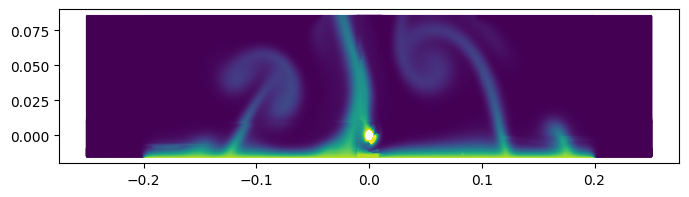

In [11]:
# Proof that they are mapped properly
fig, ax = plt.subplots(figsize=(8,2))
ax.scatter(node_x, node_y, c=T, cmap='viridis', s=1)
ax.set_title("Temperature (K)")

Text(0.5, 1.0, 'U (m/s)')

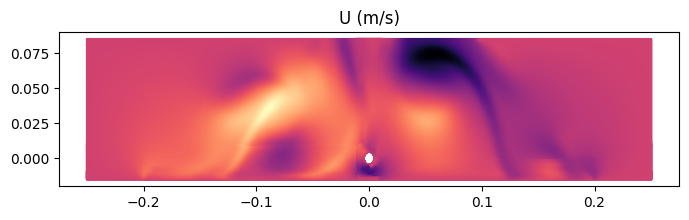

In [12]:
fig, ax = plt.subplots(figsize=(8,2))
ax.scatter(node_x, node_y, c=U, cmap='magma', s=1)
ax.set_title("U (m/s)")

Text(0.5, 1.0, 'V (m/s)')

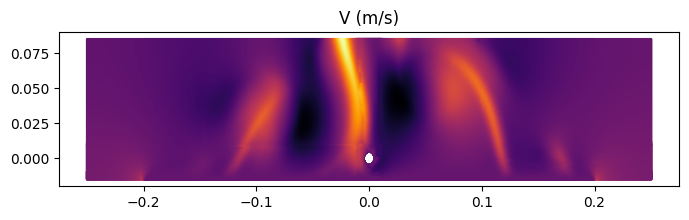

In [13]:
fig, ax = plt.subplots(figsize=(8,2))
ax.scatter(node_x, node_y, c=V, cmap='inferno', s=1)
ax.set_title("V (m/s)")